In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [176]:
tweets = pd.read_csv('/Users/romanpeerboom/Documents/GitHub/SocialWebFinal/data/output/final_with_states_codes.csv')
vaccs = pd.read_csv('/Users/romanpeerboom/Documents/GitHub/SocialWebFinal/data/output/Vaccinations_us_first')
elections = pd.read_csv('/Users/romanpeerboom/Downloads/1976-2020-president.csv')##

##later nog kijken naar hoe sentiment zich ontwikkeld door de tijd

In [201]:
tweets_grouped = tweets.groupby(['State']).mean()

tweets_grouped = tweets_grouped.sort_values(by = ['score'])
tweets_grouped.reset_index(level=0, inplace=True)
tweets_grouped.loc[22, 'State'] = 'DC'
states = tweets_grouped['State'].tolist()

In [202]:
low_states = states[:5]
high_states = states[-5:]
low_states


['MT', 'KS', 'LA', 'NY', 'MD']

In [203]:
low_states_vaccs = vaccs.loc[vaccs['Location'].isin(low_states)]
high_states_vaccs = vaccs.loc[vaccs['Location'].isin(high_states)]



In [204]:
dates = vaccs['Date'].unique().tolist()
dates.reverse()

In [205]:
statelist_low = [0]*len(dates)
for state in low_states:
    state_vac = vaccs.loc[vaccs['Location'] == state]
    for i in range(len(dates)):
        value = (state_vac.loc[state_vac['Date'] == dates[i]]['Admin_Per_100K'].iloc[0])
        statelist_low[i] += value
    print(statelist_low)

[1955, 9931, 26636, 49989, 71735, 81256, 88088, 91210, 95652, 101982, 111515, 124227]
[2497, 17719, 47950, 95001, 141632, 161194, 173616, 184227, 195855, 208140, 226742, 251630]
[3501, 27682, 71108, 138092, 199922, 227692, 246328, 263049, 286392, 305653, 331799, 364215]
[4676, 37591, 93497, 186379, 281442, 328997, 358652, 381268, 411967, 439118, 474064, 518563]
[5629, 46329, 116061, 234052, 361824, 430940, 472640, 500677, 537912, 571103, 615800, 675682]


In [206]:
statelist_high = [0]*len(dates)
for state in high_states:
    state_vac = vaccs.loc[vaccs['Location'] == state]
    for i in range(len(dates)):
        value = (state_vac.loc[state_vac['Date'] == dates[i]]['Admin_Per_100K'].iloc[0])
        statelist_high[i] += value
    print(statelist_high)

[2965, 14526, 29800, 50018, 65986, 73511, 79259, 83021, 84545, 86681, 88773, 94374]
[4072, 23863, 53303, 95562, 138098, 161143, 177561, 188371, 200840, 211639, 222223, 238789]
[5717, 34105, 77838, 143247, 216350, 258787, 285285, 300966, 319583, 336488, 357304, 388879]
[8245, 47159, 109146, 198293, 290556, 339432, 369676, 388181, 411154, 434231, 463750, 506895]
[9430, 57305, 136228, 244984, 352451, 407791, 442805, 465518, 493836, 524236, 562101, 616618]


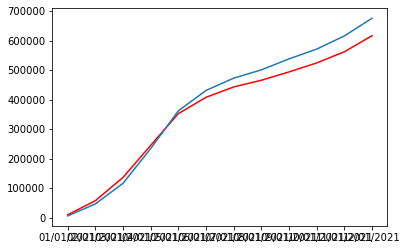

In [207]:
plt.plot(dates, statelist_high, color = 'r')
plt.plot(dates, statelist_low)

In [208]:
elections = elections.loc[elections['year'] == 2020]
elections_dem  = elections.loc[elections['party_detailed'] == 'DEMOCRAT']
elections_rep  = elections.loc[elections['party_detailed'] == 'REPUBLICAN']
elections_dem.reset_index(level=0, inplace=True)
elections_rep.reset_index(level=0, inplace=True)
elect_results = pd.DataFrame()
elect_results['State'] = states
elect_results['Winner'] = 'DEM'
elect_results['Prc_dem'] = 0


In [209]:
for i in range(len(states)):
    if elections_dem.loc[i, 'candidatevotes'] < elections_rep.loc[i, 'candidatevotes']:
        elect_results.loc[i, 'Winner'] = 'REP'
    elect_results.loc[i, 'Prc_dem'] = elections_dem.loc[i, 'candidatevotes']/ elections_dem.loc[i, 'totalvotes']

In [210]:
high_states

['WV', 'FL', 'CO', 'ND', 'WY']

In [211]:
high_score = 0
for state in high_states:
    state_elect = elect_results.loc[elect_results['State'] == state]
    high_score += float(state_elect['Prc_dem'])

In [212]:
low_score = 0
for state in low_states:
    state_elect = elect_results.loc[elect_results['State'] == state]
    low_score += float(state_elect['Prc_dem'])
    

In [219]:
print(high_score)
print(low_score)

2.176137429770433
2.2696564194439794


In [214]:
tweets_high = tweets.loc[tweets['State'].isin(high_states)]
tweets_high.reset_index(level=0, inplace=True)

<ipython-input-215-dbd880c44132>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_high['month'] = np.nan
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


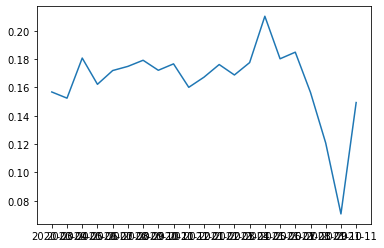

In [215]:
tweets_high['month'] = np.nan
for i in range(len(tweets_high)):
    tweets_high.loc[i, 'month'] = tweets_high.loc[i, 'date'][:7]

tweets_month_high = tweets_high.groupby(['month']).mean()
#tweets_month = tweets_month.sort_values(by = ['score'])
tweets_month_high.reset_index(level=0, inplace=True)
plt.plot(tweets_month_high['month'][:-1], tweets_month_high['score'].tolist()[:-1])


In [216]:
tweets_low = tweets.loc[tweets['State'].isin(low_states)]
tweets_low.reset_index(level=0, inplace=True)

<ipython-input-217-d64103b24489>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_low['month'] = np.nan
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


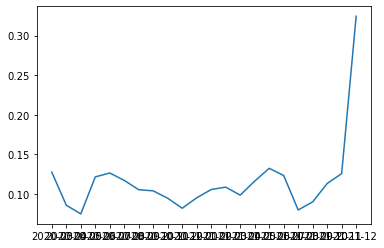

In [217]:
tweets_low['month'] = np.nan
for i in range(len(tweets_low)):
    tweets_low.loc[i, 'month'] = tweets_low.loc[i, 'date'][:7]

tweets_month_low = tweets_low.groupby(['month']).mean()
#tweets_month = tweets_month.sort_values(by = ['score'])
tweets_month_low.reset_index(level=0, inplace=True)
plt.plot(tweets_month_low['month'], tweets_month_low['score'].tolist())

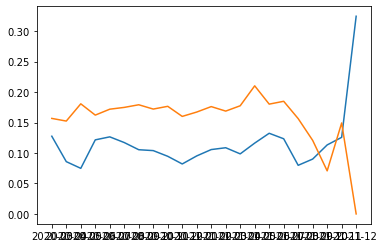

In [218]:
plt.plot(tweets_month_low['month'], tweets_month_low['score'].tolist())
plt.plot(tweets_month_high['month'], tweets_month_high['score'].tolist())

In [233]:
vaccs_month_avg = vaccs.groupby(['Date']).mean()['Admin_Per_100K'].tolist()


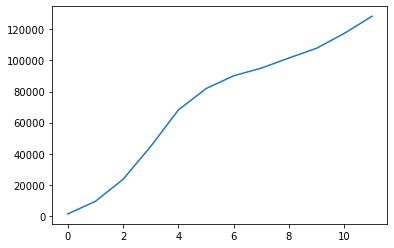

In [231]:
plt.plot(range(len(vaccs_month_avg)), vaccs_month_avg)
## per staat per maand -+ gemiddelde vd maand 

In [248]:
differences = [] 
for i in range(len(dates)):
    sum_vaccs = 0
    last_sum = 0
    df_date = vaccs.loc[vaccs['Date'] == dates[i]]
    for state in high_states:
        state_df = df_date.loc[df_date['Location'] == state]
        sum_vaccs += float(state_df['Admin_Per_100K'])
        increase = sum_vaccs - last_sum
        last_sum = sum_vaccs
    if i == 0:
        differences.append((increase/5) - vaccs_month_avg[i])
    else:
        differences.append((increase/5) - vaccs_month_avg[i] + vaccs_month_avg[i-1])
    
        

[-1021.4615384615386, -6014.200000000001, -8768.076923076924, -11820.999999999996, -11092.307692307695, -94.5384615384537, 6394.0, 10512.030769230769, 10024.90769230768, 11699.24615384615, 10121.175000000003, 10936.646875000006]


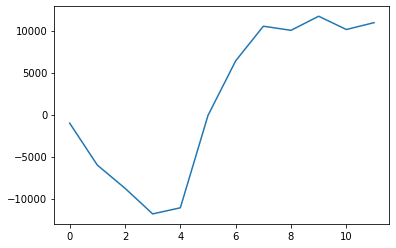

In [250]:
print(differences)
plt.plot(range(len(differences)), differences)

In [236]:
dates

['01/01/2021',
 '02/01/2021',
 '03/01/2021',
 '04/01/2021',
 '05/01/2021',
 '06/01/2021',
 '07/01/2021',
 '08/01/2021',
 '09/01/2021',
 '10/01/2021',
 '11/01/2021',
 '12/01/2021']